<a href="https://colab.research.google.com/github/ravindu556/cm2604-telco-churn/blob/main/telco_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

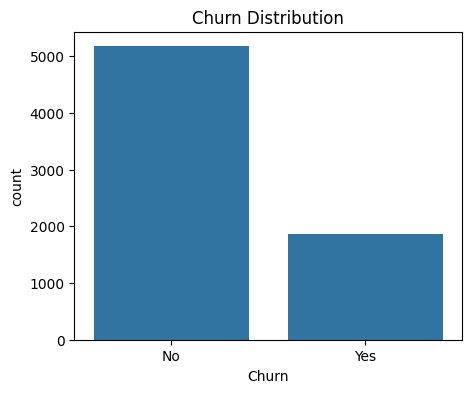

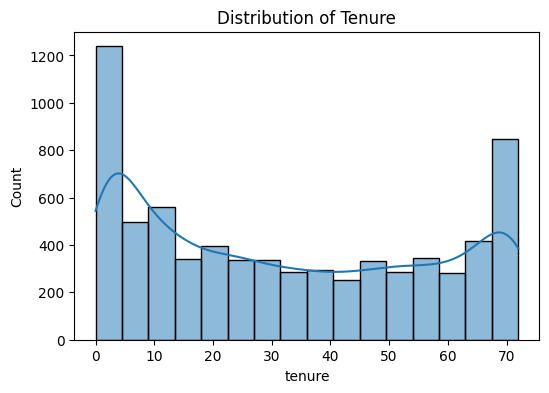

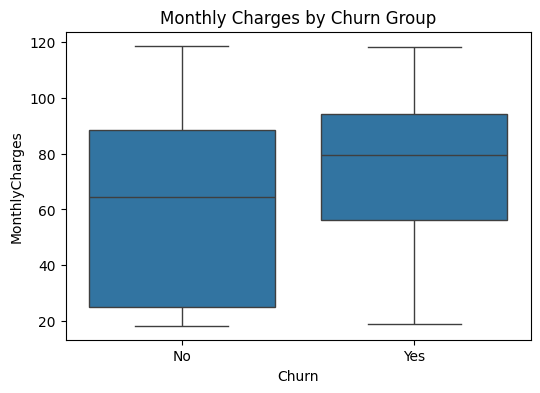

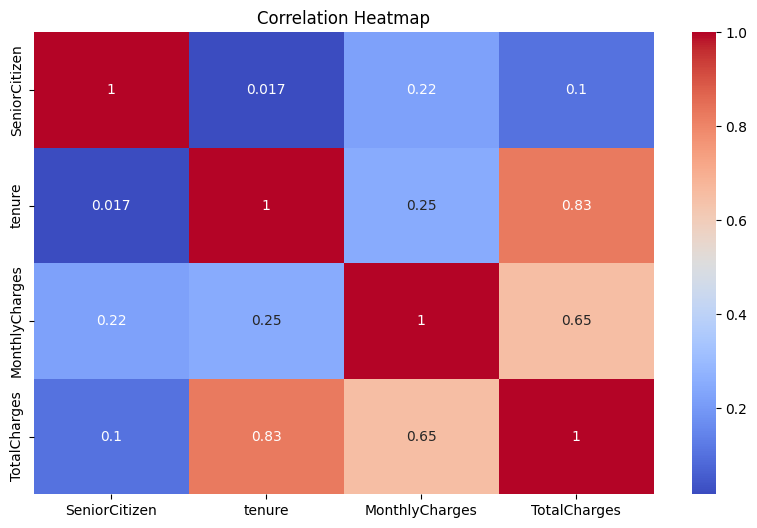

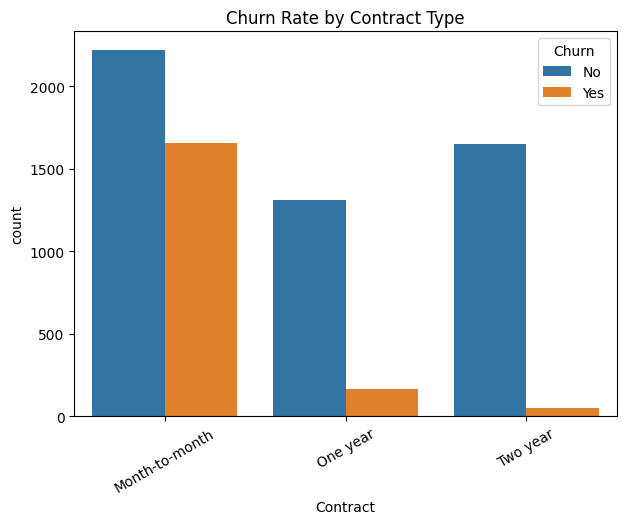

Missing values percentage:
 customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-3377935957.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


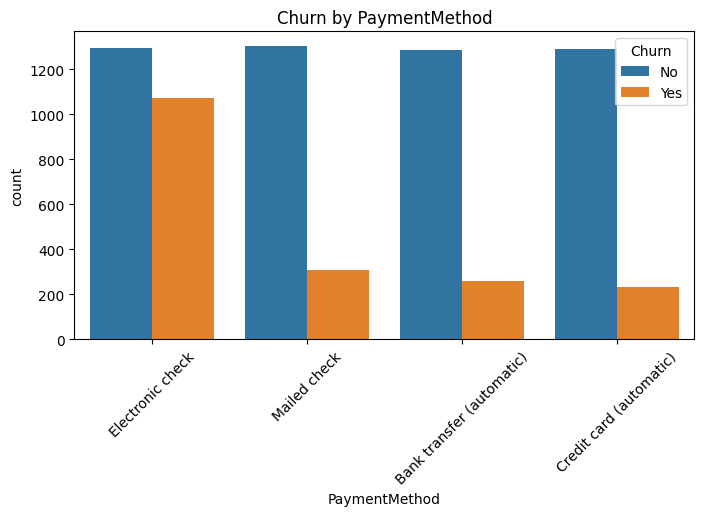

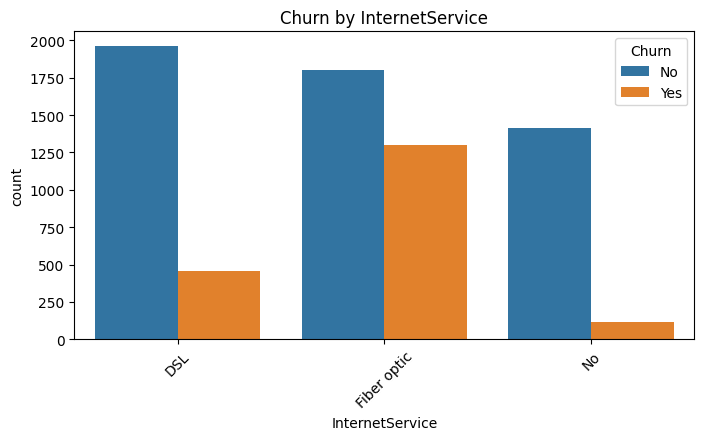

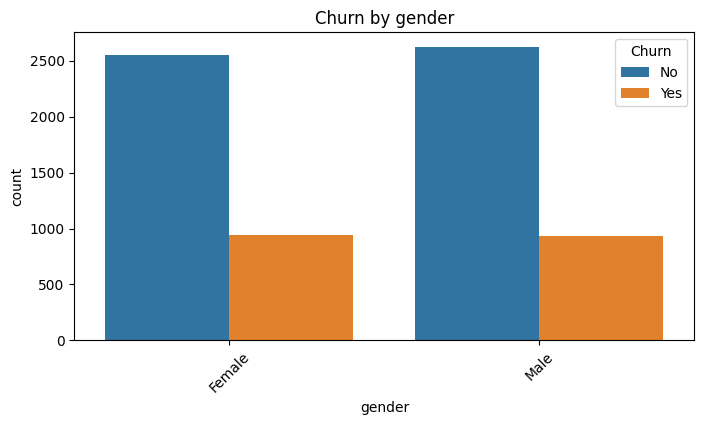

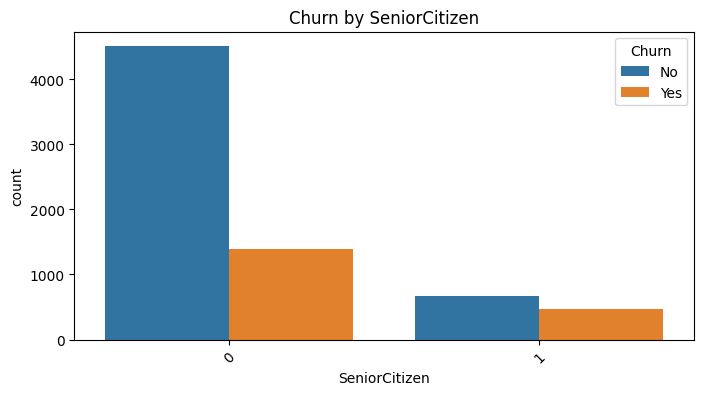

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

print("Dataset shape:", df.shape)
df.info()

df.isnull().sum()

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()

df.describe(include="all")

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Tenure")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Group")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.drop('customerID', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=30)
plt.show()

# Check percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:\n", missing_percent)

#  Handle the missing TotalCharges (required!)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

#  Check target variable percentages
print("\nChurn percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

categorical_cols = ['PaymentMethod', 'InternetService', 'gender', 'SeniorCitizen']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.show()

